In [56]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from tsmoothie.smoother import *

In [57]:
def load_data(file1,file2):
    
    df1=pd.read_excel(file1, sheet_name='Lastprofil', skiprows=4)
    df2=pd.read_excel(file2, sheet_name='Lastprofil', skiprows=4)
    
    df = pd.concat([df1, df2])
    
    df = df.drop(index=0)
    df = df.set_index("OBIS Bezeichnung")
    df.index.names = ['Time']
    
    df.columns = [c.replace(' ', '_') for c in df.columns]
    df.columns = [c.replace('.', '_') for c in df.columns]
    
    cols = df.columns
    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
    
    return df


In [58]:
df_Chemie=load_data('Chemie.xls','Chemie_01_26-07_19.xls')
df_Gross=load_data('Grosstagespflege_04_05-07_19.xls','Großtagespflege.xls')
df_HGII=load_data('HGII_01_26-07_19.xls','HG II.xls')
df_Kita=load_data('Kita Hokido_05_22_20-07_19_22.xls','Kita Hokido.xls')
df_OH12=load_data('OH12_01_26-07_19.xls','OH12.xls')
df_OH14=load_data('OH14_01_26-07_19.xls','OH14.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


## De-noising using Kalman Filter

### Großtagespflege Building

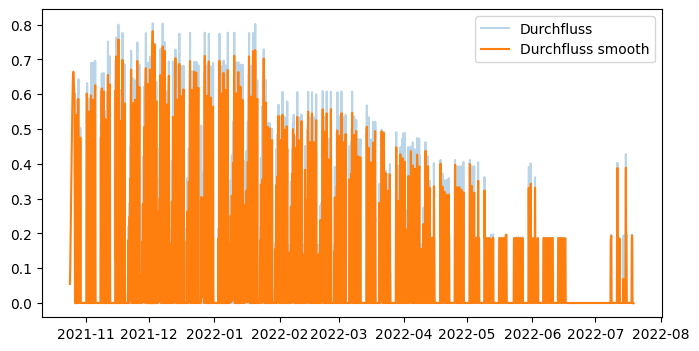

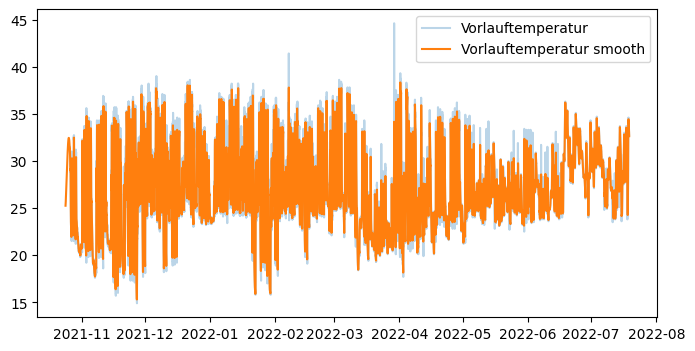

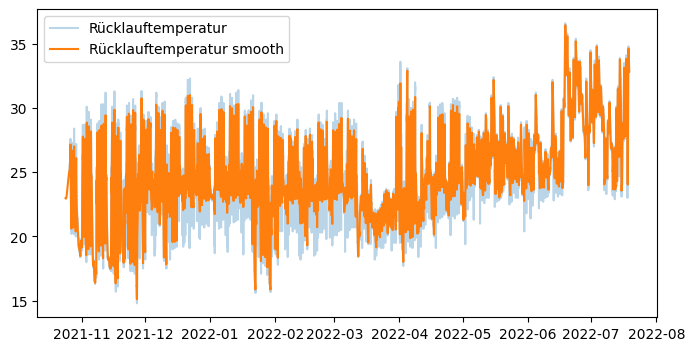

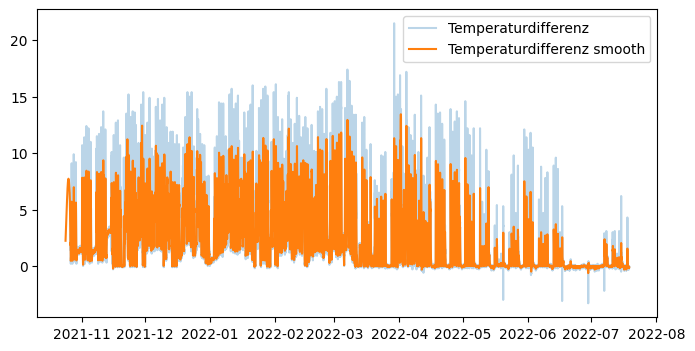

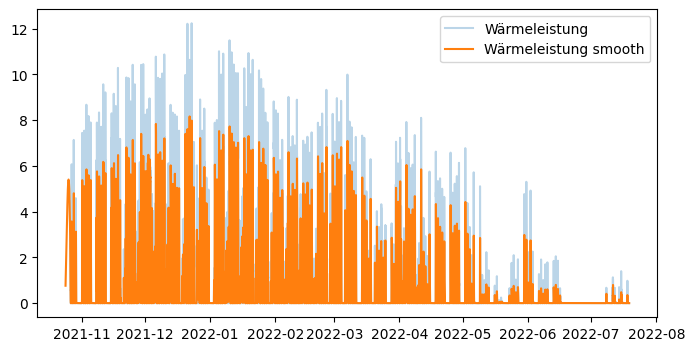

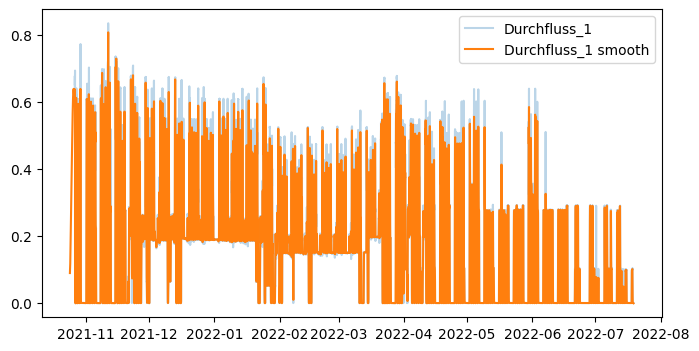

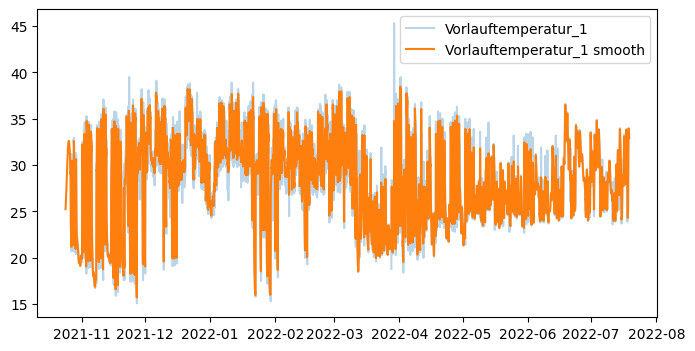

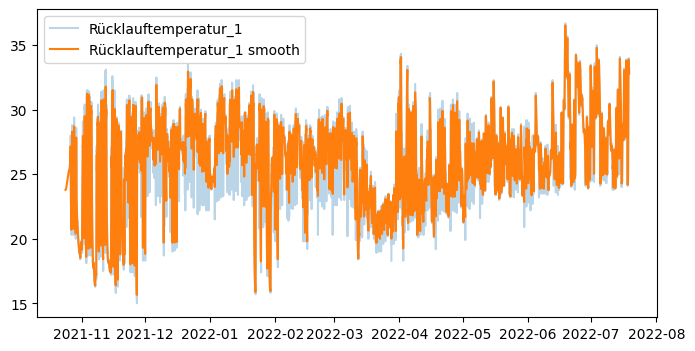

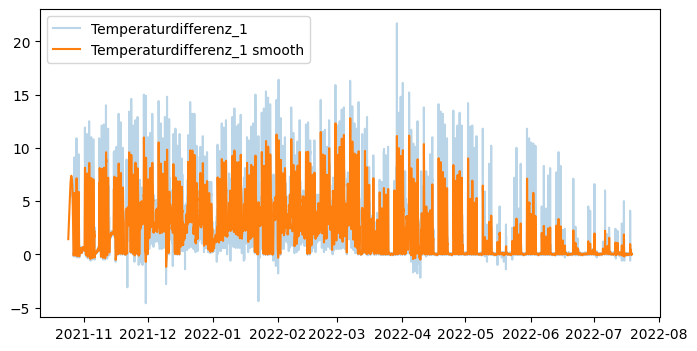

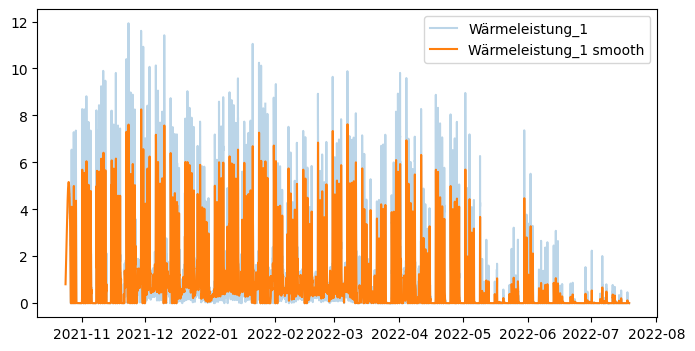

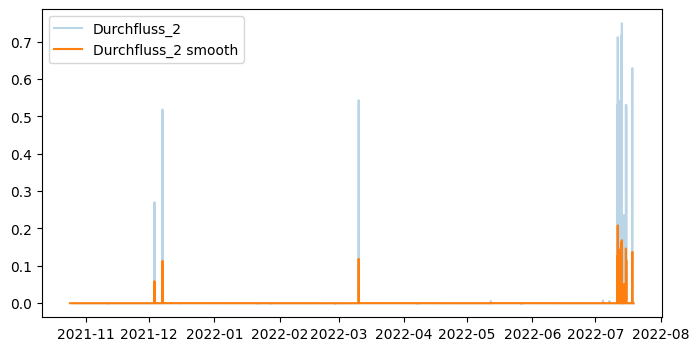

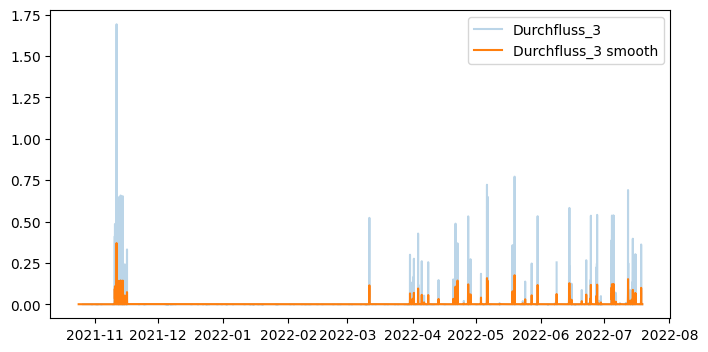

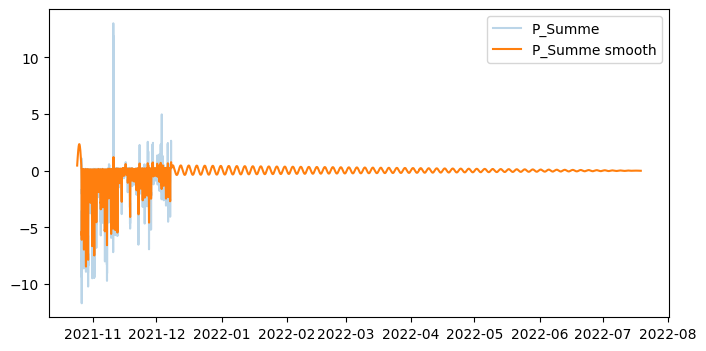

In [59]:
df = df_Gross[['Durchfluss', 'Vorlauftemperatur', 'Rücklauftemperatur', 'Temperaturdifferenz', 'Wärmeleistung','Durchfluss_1',
 'Vorlauftemperatur_1', 'Rücklauftemperatur_1', 'Temperaturdifferenz_1', 'Wärmeleistung_1', 'Durchfluss_2', 'Durchfluss_3', 'P_Summe']]

### USE KALMAN FILTER TO SMOOTH ALL DATA (ONLY VISUALIZATION PURPOSE) ###

smoother = KalmanSmoother(component='level_longseason', 
                          component_noise={'level':0.1, 'longseason':0.1}, 
                          n_longseasons=365)
smoother.smooth(df[['Durchfluss', 'Vorlauftemperatur', 'Rücklauftemperatur', 'Temperaturdifferenz', 'Wärmeleistung','Durchfluss_1',
 'Vorlauftemperatur_1', 'Rücklauftemperatur_1', 'Temperaturdifferenz_1', 'Wärmeleistung_1', 'Durchfluss_2', 'Durchfluss_3', 'P_Summe']].T)

for i,name in enumerate(df.columns):
    
    plt.figure(figsize=(8,4))
    plt.plot(df.index, smoother.data[i], label=name, alpha=0.3)
    plt.plot(df.index, smoother.smooth_data[i], label=name+' smooth')
    plt.legend(); plt.show()

### HG_II Building

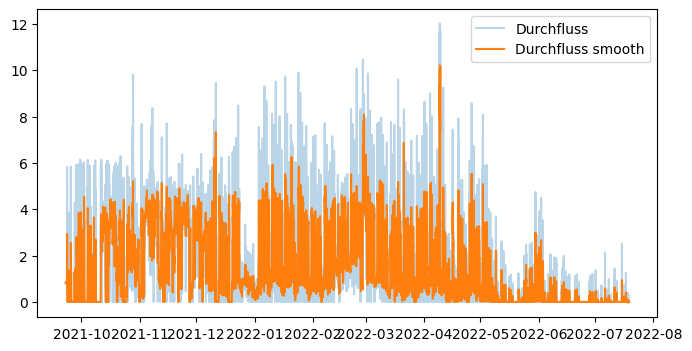

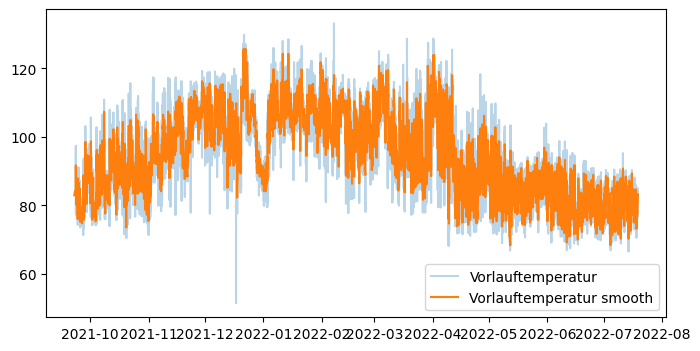

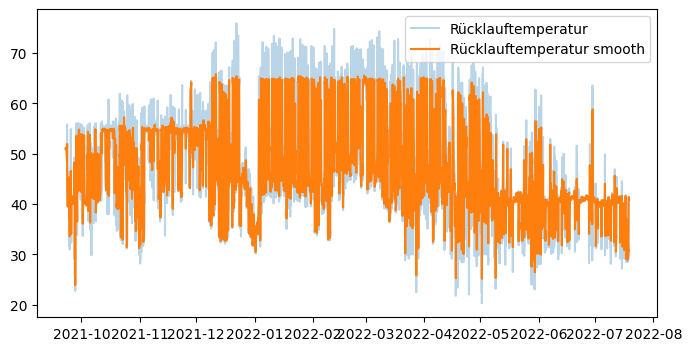

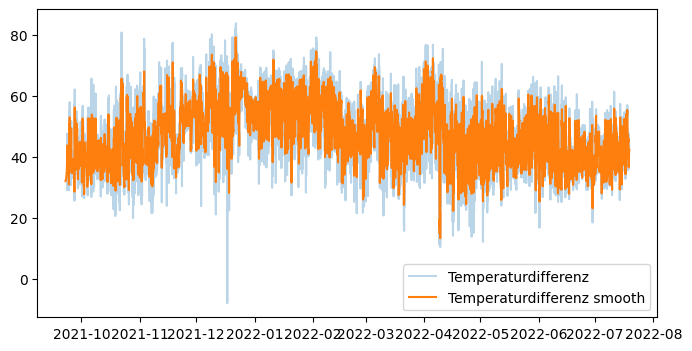

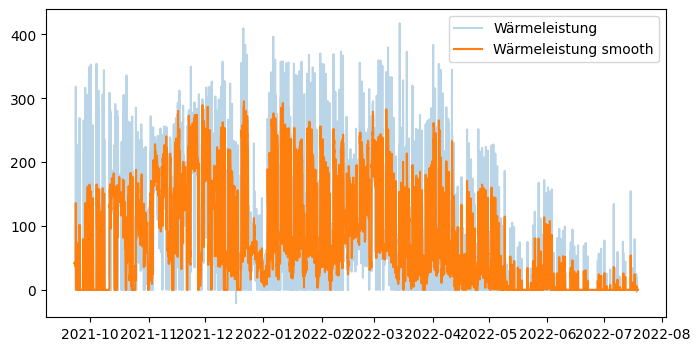

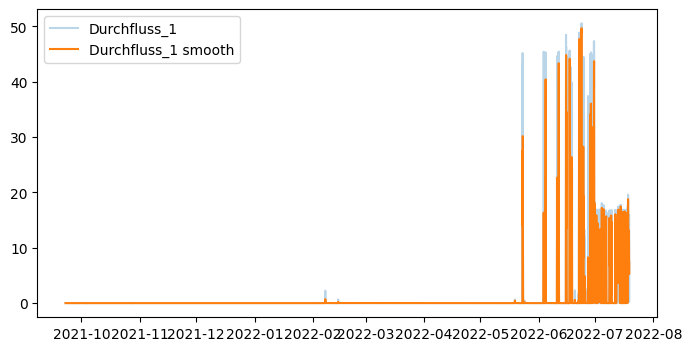

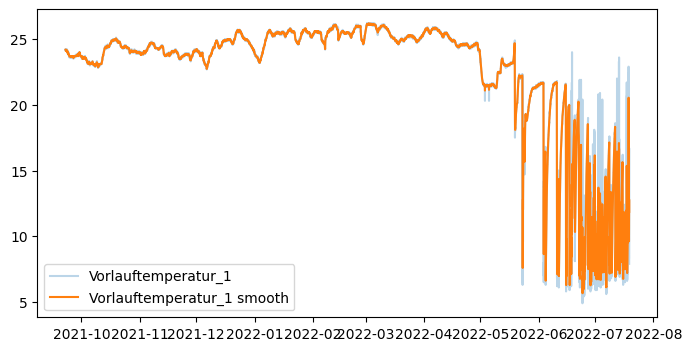

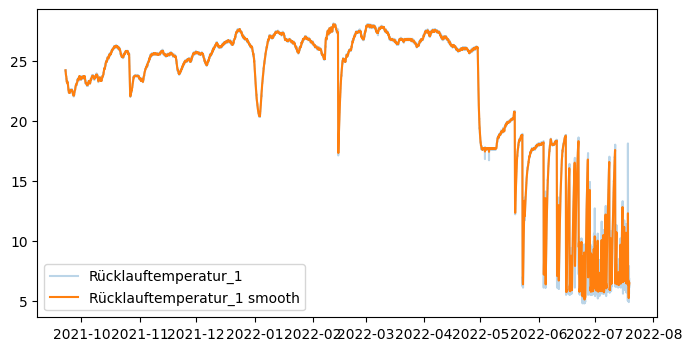

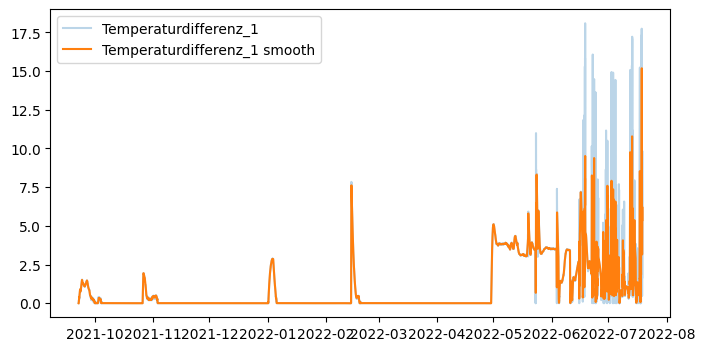

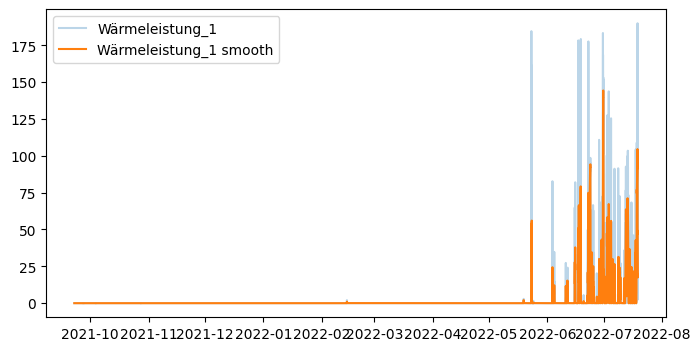

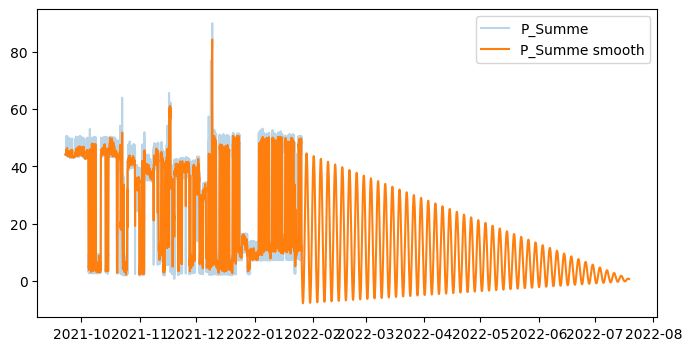

In [60]:
df = df_HGII[['Durchfluss', 'Vorlauftemperatur', 'Rücklauftemperatur', 'Temperaturdifferenz', 'Wärmeleistung',
 'Durchfluss_1','Vorlauftemperatur_1','Rücklauftemperatur_1','Temperaturdifferenz_1',
 'Wärmeleistung_1', 'P_Summe']]

### USE KALMAN FILTER TO SMOOTH ALL DATA (ONLY VISUALIZATION PURPOSE) ###

smoother = KalmanSmoother(component='level_longseason', 
                          component_noise={'level':0.1, 'longseason':0.1}, 
                          n_longseasons=365)
smoother.smooth(df[['Durchfluss', 'Vorlauftemperatur', 'Rücklauftemperatur', 'Temperaturdifferenz', 'Wärmeleistung',
 'Durchfluss_1', 'Vorlauftemperatur_1','Rücklauftemperatur_1','Temperaturdifferenz_1',
 'Wärmeleistung_1', 'P_Summe']].T)

### PLOT RAW vs SMOOTHED DATA ###

for i,name in enumerate(df.columns):
    plt.figure(figsize=(8,4))
    plt.plot(df.index, smoother.data[i], label=name, alpha=0.3)
    plt.plot(df.index, smoother.smooth_data[i], label=name+' smooth')
    plt.legend(); plt.show()
    

### Chemie Building

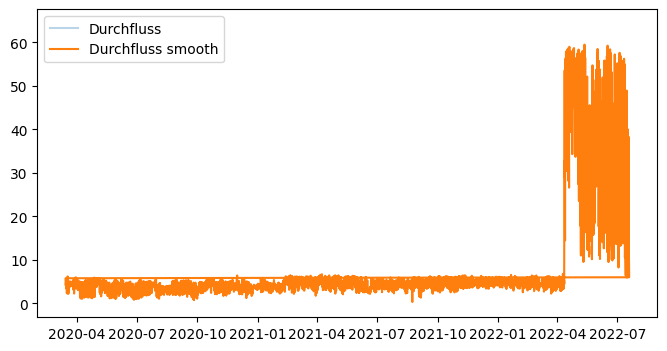

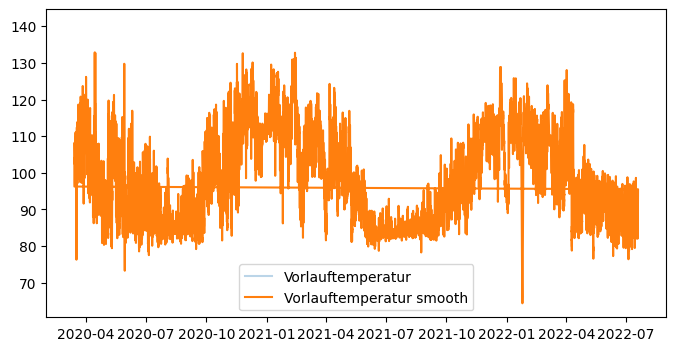

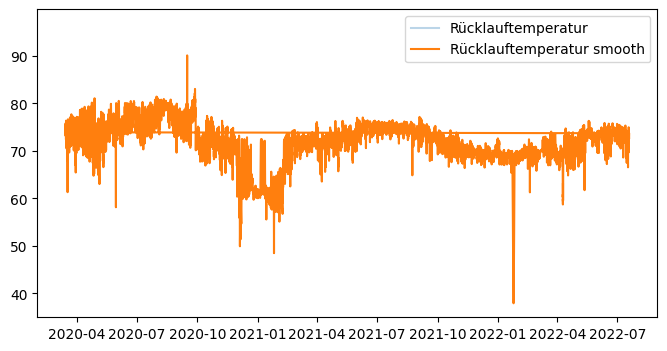

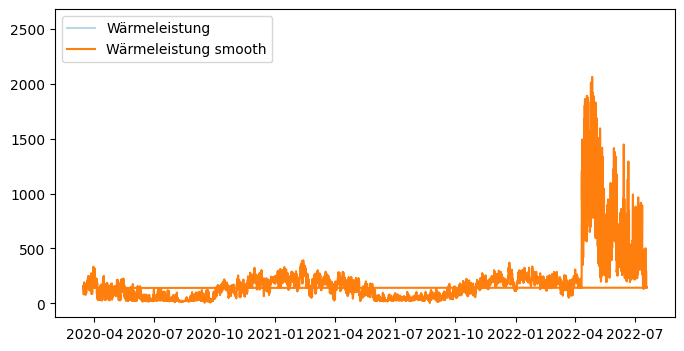

In [66]:
df = df_Chemie[['Durchfluss', 'Vorlauftemperatur', 'Rücklauftemperatur', 'Wärmeleistung']]

### USE KALMAN FILTER TO SMOOTH ALL DATA (ONLY VISUALIZATION PURPOSE) ###

smoother = KalmanSmoother(component='level_longseason', 
                          component_noise={'level':0.1, 'longseason':0.1}, 
                          n_longseasons=365)
smoother.smooth(df[['Durchfluss', 'Vorlauftemperatur', 'Rücklauftemperatur', 'Wärmeleistung']].T)

### PLOT RAW vs SMOOTHED DATA ###

for i,name in enumerate(df.columns):
    plt.figure(figsize=(8,4))
    plt.plot(df.index, smoother.data[i], label=name, alpha=0.3)
    plt.plot(df.index, smoother.smooth_data[i], label=name+' smooth')
    plt.legend(); plt.show()
    

### OH14 Building

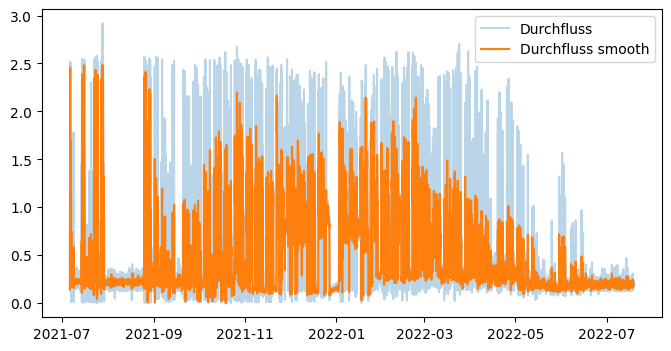

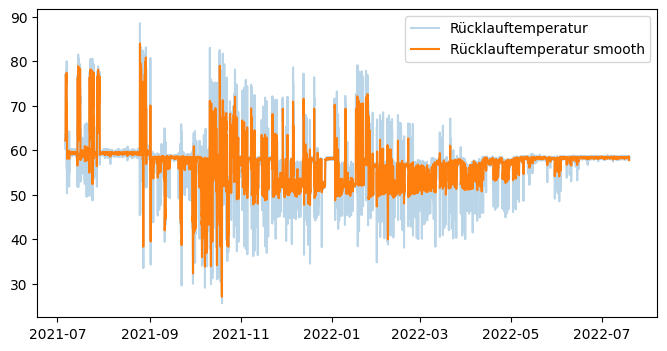

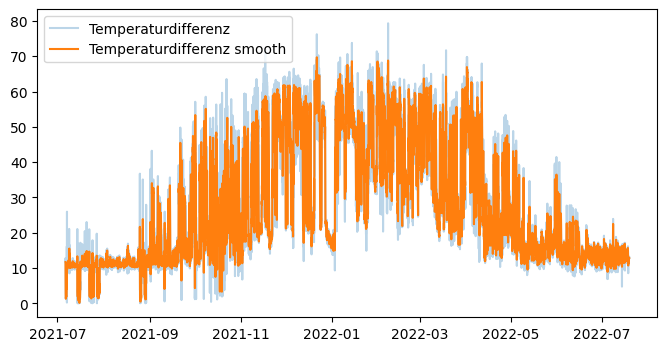

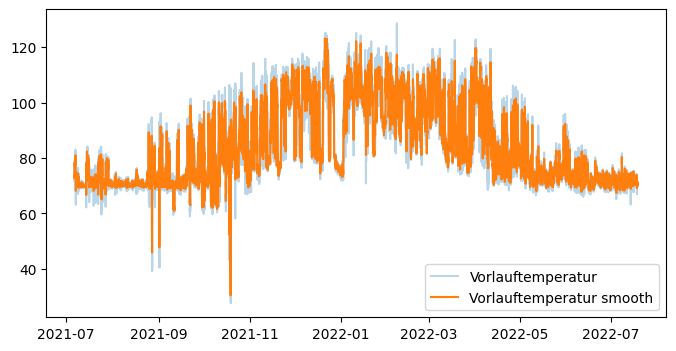

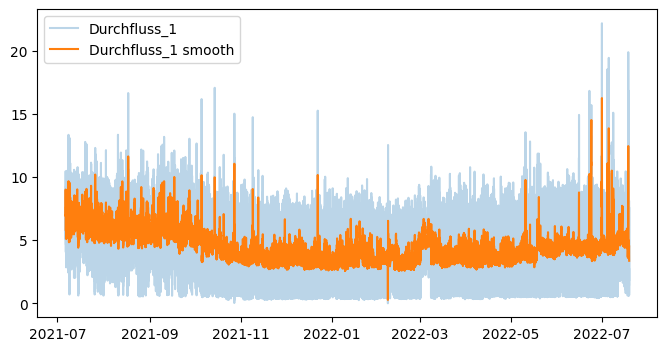

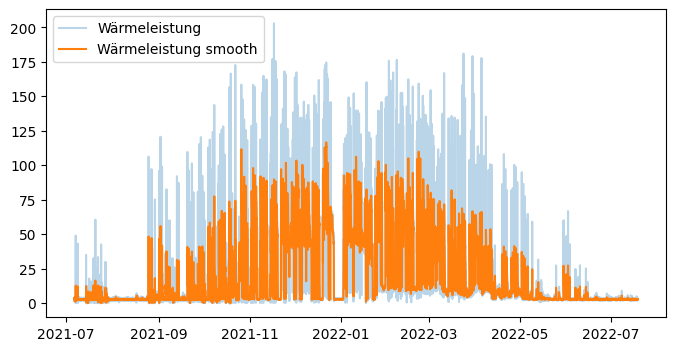

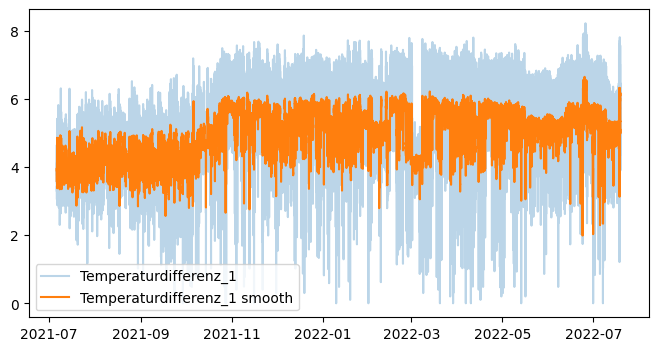

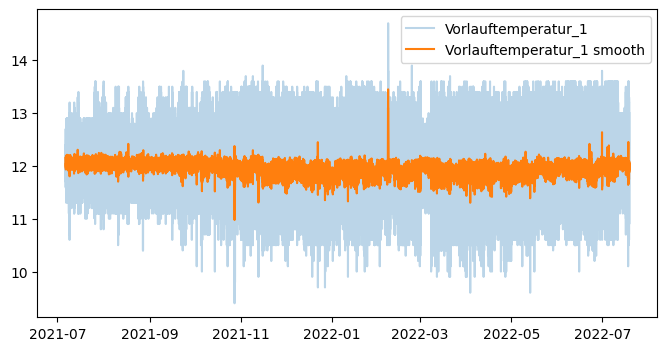

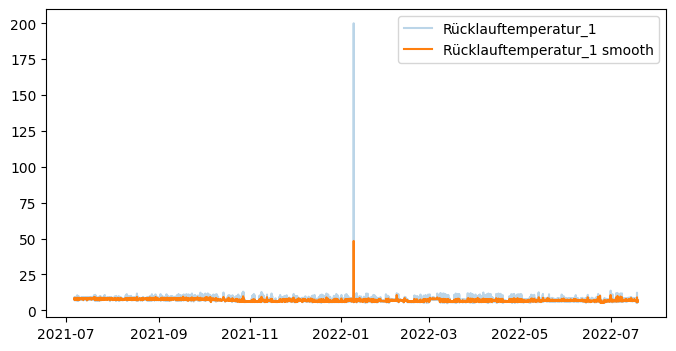

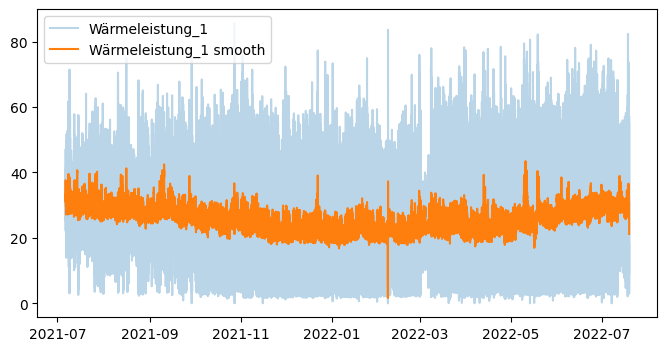

In [62]:
df = df_OH14[['Durchfluss','Rücklauftemperatur','Temperaturdifferenz','Vorlauftemperatur','Durchfluss_1','Wärmeleistung', 'Temperaturdifferenz_1','Vorlauftemperatur_1', 'Rücklauftemperatur_1', 'Wärmeleistung_1']]

### USE KALMAN FILTER TO SMOOTH ALL DATA (ONLY VISUALIZATION PURPOSE) ###

smoother = KalmanSmoother(component='level_longseason', 
                          component_noise={'level':0.1, 'longseason':0.1}, 
                          n_longseasons=365)
smoother.smooth(df[['Durchfluss','Rücklauftemperatur','Temperaturdifferenz','Vorlauftemperatur','Durchfluss_1','Wärmeleistung', 'Temperaturdifferenz_1','Vorlauftemperatur_1', 'Rücklauftemperatur_1', 'Wärmeleistung_1']].T)

### PLOT RAW vs SMOOTHED DATA ###

for i,name in enumerate(df.columns):
    plt.figure(figsize=(8,4))
    plt.plot(df.index, smoother.data[i], label=name, alpha=0.3)
    plt.plot(df.index, smoother.smooth_data[i], label=name+' smooth')
    plt.legend(); plt.show()
    

### Kita Hokido Building

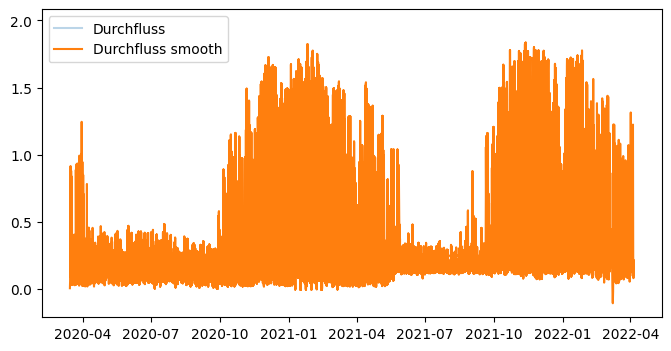

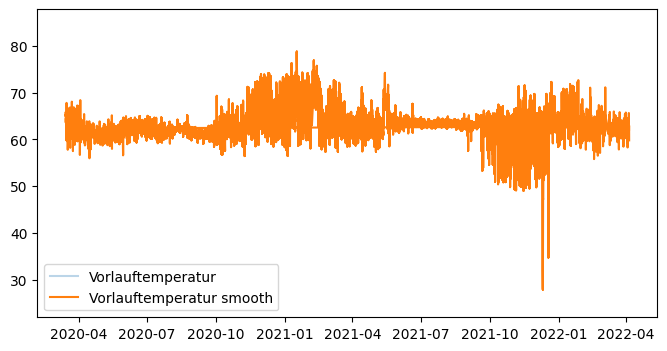

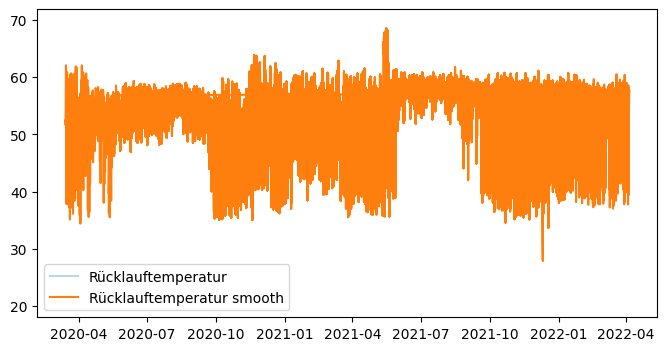

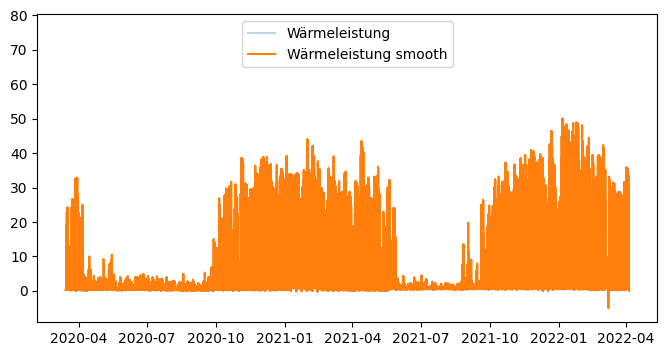

In [63]:
df = df_Kita[['Durchfluss', 'Vorlauftemperatur', 'Rücklauftemperatur', 'Wärmeleistung']]

### USE KALMAN FILTER TO SMOOTH ALL DATA (ONLY VISUALIZATION PURPOSE) ###

smoother = KalmanSmoother(component='level_longseason', 
                          component_noise={'level':0.1, 'longseason':0.1}, 
                          n_longseasons=365)
smoother.smooth(df_Kita[['Durchfluss', 'Vorlauftemperatur', 'Rücklauftemperatur', 'Wärmeleistung',
 'Volumen_Kanal_1']].T)

### PLOT RAW vs SMOOTHED DATA ###

for i,name in enumerate(df.columns):
    plt.figure(figsize=(8,4))
    plt.plot(df.index, smoother.data[i], label=name, alpha=0.3)
    plt.plot(df.index, smoother.smooth_data[i], label=name+' smooth')
    plt.legend(); plt.show()
    

### OH_12 Building

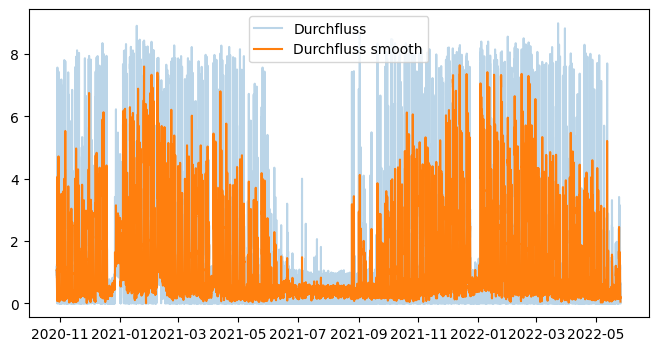

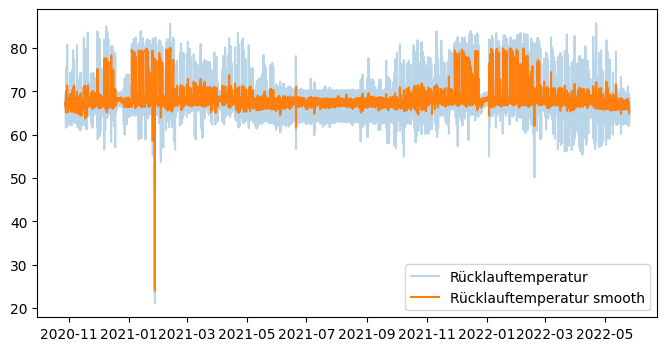

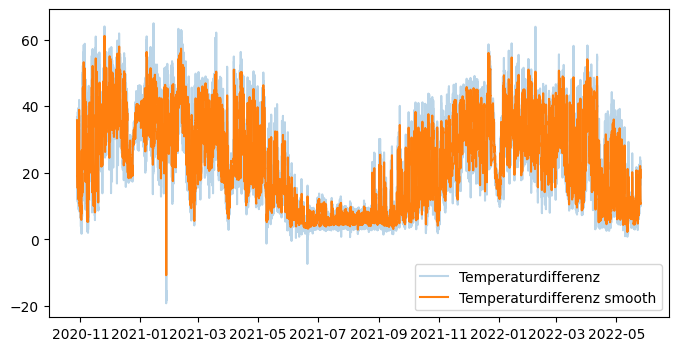

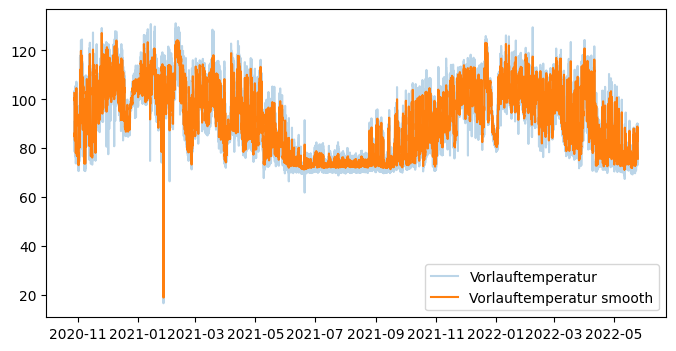

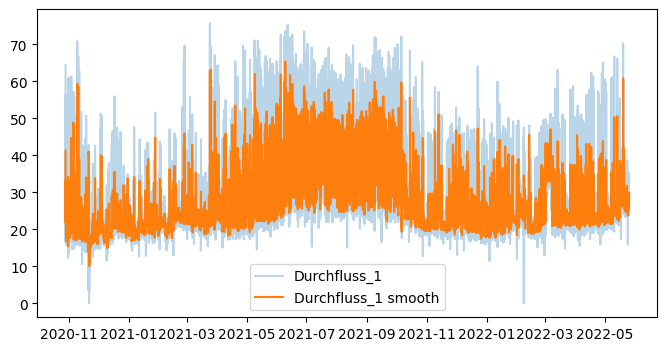

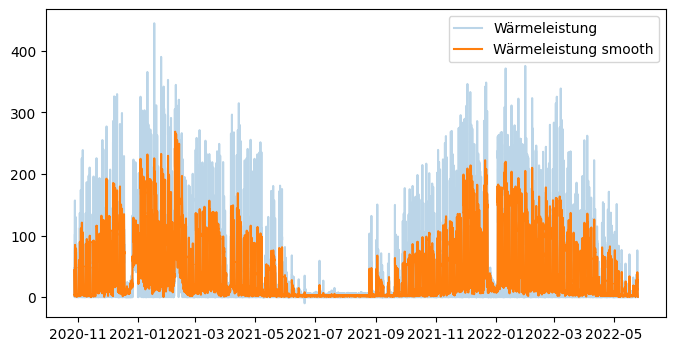

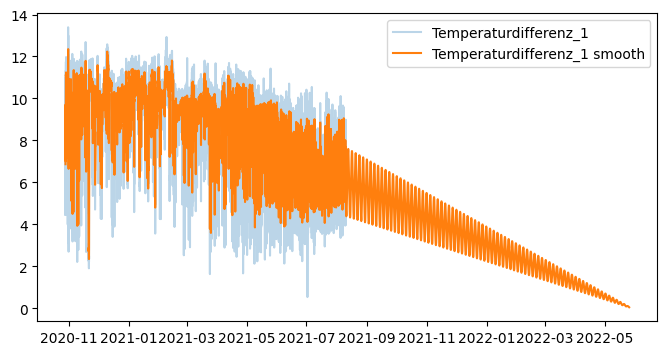

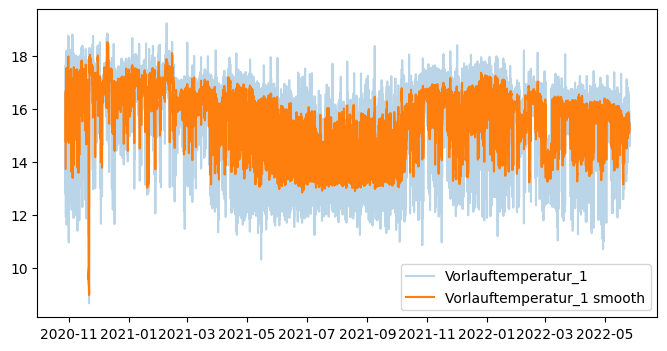

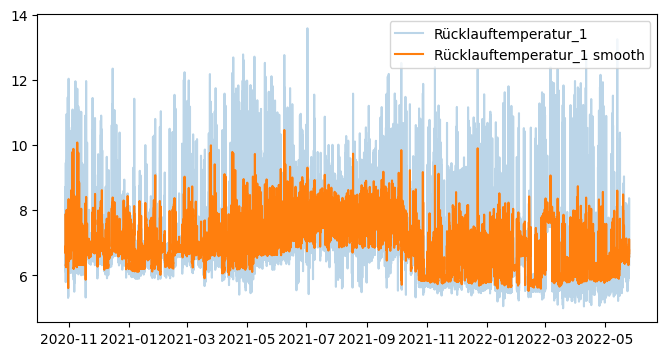

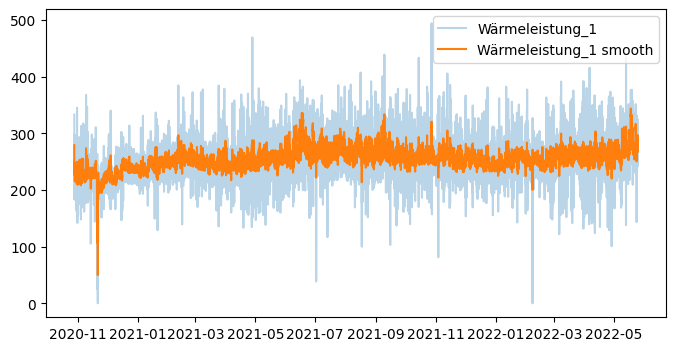

In [64]:

df = df_OH12[['Durchfluss','Rücklauftemperatur','Temperaturdifferenz','Vorlauftemperatur','Durchfluss_1','Wärmeleistung', 'Temperaturdifferenz_1','Vorlauftemperatur_1', 'Rücklauftemperatur_1', 'Wärmeleistung_1']]

smoother = KalmanSmoother(component='level_longseason', 
                          component_noise={'level':0.1, 'longseason':0.1}, 
                          n_longseasons=365)
smoother.smooth(df[['Durchfluss','Rücklauftemperatur','Temperaturdifferenz','Vorlauftemperatur',
                        'Durchfluss_1','Wärmeleistung', 'Temperaturdifferenz_1','Vorlauftemperatur_1', 
                        'Rücklauftemperatur_1', 'Wärmeleistung_1']].T)
    
### PLOT RAW vs SMOOTHED DATA ###

for i,name in enumerate(df.columns):
    plt.figure(figsize=(8,4))
    plt.plot(df.index, smoother.data[i], label=name, alpha=0.3)
    plt.plot(df.index, smoother.smooth_data[i], label=name+' smooth')
    plt.legend(); plt.show()
    